# Dimensionsreduktion

Bisher haben wir uns ausschließlich mit Methoden und Aufgaben aus dem Bereich des überwachten Lernens (Supervised Learning) befasst. Charakteristisch für das überwachte Lernen ist die Grundvoraussetzung einer Zielvariable. Diese muss durch den Nutzer spezifiziert werden. Oftmals kommt sogar noch hinzu, dass der Nutzer die Beobachtungen vor dem Trainieren des Modells selbst labeln muss. Dies betrifft beispielsweise der Beurteilung, ob Produktrezensionen positiv oder negativ sind. Die Betrachtung beim überwachten Lernen ist immer eine bedingte Betrachtung. Bedingt auf die Informationen der unabhängigen Variablen, welche Erwartung resultiert für die abhängige Variable. In manchen Situationen ist die unbedingte Betrachtung aller Variablen das Ziel. Allgemein gesprochen, möchte man bei dieser Art der Analyse Erkenntnisse über einen Datensatz erlangen, ohne sich auf eine Variable zu fokussieren. Dies ist Ziel des unüberwachten Lernens (Unsupervised Learing). Wie beim überwachten Lernen existieren verschiedene Fragestellungen und Methoden. Zwei gängige Aufgaben des unüberwachten Lernens ist die Dimensionsreduktion und das Clustering von Daten. Wir wollen uns in diesem Kapitel mit der Dimensionsreduktion beschäftigen ehe wir uns im Folgekapitel das Clustering ansehen. 

Bei der Dimensionsreduktion geht es darum aus $p$ Variablen eines Datensatzes $d$ neue Variablen zu generieren, wobei $d<p$ ist und möglichst wenig Informationsgehalt der originalen Daten bei der Reduzierung der Variablen verloren gehen soll. Einsatzmöglichkeiten von Dimensionsreduktionstechniken sind vielfältig. Hat ein Datensatz mehr als $3$ Variablen, können wir die Daten nicht mehr visualisieren. Entsprechend können Dimensionsreduktionstechniken zur Reduktion der Variablenanzahl auf $2$ oder $3$ Dimensionen eingesetzt werden, um die Daten zumindest in kompirmierter Form visualisieren zu können. Des weiteren haben Methoden des überwachten Lernens oft Probleme, allgemeine Zusammenhänge zwischen den unabhängigen Daten und der Zielvariable zu identifizieren, wenn die Anzahl der unabhängigen Variablen $p$ sehr hoch ist. Entsprechend kann es oft zu einer Verbesserung der Prognosen von Modellen kommen, wenn die unabhängigen Variablen auf eine kleinere Anzahl an Variablen reduziert werden, und diese Variablen im Anschluss für das Trainieren des Modells für die Zielvariable zu verwenden. Weiter Anwendungsgebiete der Dimensionsreduktion sind die Identifikation von Ausreissern, das Ersetzen fehlender Daten oder die Kombination mit dem im nächsten Kapitel besprochenen Clustering. 

## Hauptkomponentenanalyse

Während wir auf unterschiedliche Arten der Dimensionsreduktion zurückgreifen können, wollen wir uns in diesem Kurs beispielhaft ausschließlich mit der Hauptkomponentenanalyse (Principal Component Analysis - PCA) befassen, die bis heute einen hohen Stellenwert hat. Ähnlich wie das lineare Regressionsmodell ist die PCA nicht in der Lage nicht-lineare Zusammenhänge zwischen den Variablen zu berückstichtigen. Dafür hat sie sehr interessante und nützliche mathematische Eigenschaften aufgrund derer sie bis heute weit verbreitet eingesetzt wird. Wie die PCA technisch funktioniert kann durch unterschiedliche Interpretationen erklärt werden. Ich möchte mich auf die Interpretation beschränken, die der Art wie Modelle des überwachten Lernens trainiert wurden, sehr nahe kommt. Gegeben sei ein Datensatz mit $n$ Beobachtungen von $p$ Variablen:

$$
X = 
\begin{pmatrix}
x_{11} & ... & x_{1p} \\
\vdots & \ddots & \vdots \\
x_{n1} & ... & x_{np} \\
\end{pmatrix}
$$

Für die PCA ist die Variation aller Datenpunkte von Interesse, daher werden alle Variablen vorab durch Subtrahieren des jeweiligen Mittelwerts auf den Durchschnittswert $0$ transformiert. Durch diese Transformation kann die gesamte Variation der Daten durch den Durchschnitt aller quadrierten Werte quantifiziert werden kann:

$$
Var(X) = \frac{1}{n} \sum_{j = 1}^p \sum_{i = 1}^n x_{ij}^2
$$

Ziel der PCA ist es, $d$ neue Variablen zu erzeugen, die möglichst viel dieser Variation erklären können. Erinnern Sie sich an die lineare Regression zurück, ist dies auf analoge Art ähnlich, da bei der Regression die Variation der tatsächlicher Realisierung möglichst gut durch die Prognose des Modells erklärt werden soll. Eine neue Variable $z_m$, $m = 1, ... d$ zu erzeugen, wird in der PCA durch die lineare Kombination der bestehenden Variablen realisiert. Die Linearkombination ist durch:

$$
z_m = \phi_{1m} x_1 + \phi_{2m} x_2 + ... + \phi_{pm} x_p
$$

gegeben. Haben wir beispielsweise nur zwei Variablen $x_1, x_2$, so könnte eine Variable $z_1$ durch:


$$
z_1 = \phi_{11} x_1 + \phi_{21} x_2  
$$

generiert werden. Bei $\phi_{11}, \phi_{21}$ handelt es sich um Parameter, die anhand von Daten trainiert werden. Das Ziel der PCA ist es $z_1$ so zu bilden, dass aus dieser einen Variablen die Originaldaten möglichst gut wieder erzeugt werden könnten. Bezeichnen wir den Parametervektor für dieses Beispiel $\boldsymbol{\phi}_1 = \begin{pmatrix} \phi_{11} & \phi_{21}  \end{pmatrix}^T$, so ensteht für jede Beobachtung $\boldsymbol{x} = \begin{pmatrix} x_{1} & x_{2} \end{pmatrix}^T$ der Wert der neuen Variable $z_{1}$ durch:

$$
z_{1} = 
\begin{pmatrix} x_{1} & x_{2} \end{pmatrix}
\begin{pmatrix} \phi_{11} \\ \phi_{21} \end{pmatrix}
$$

Multipliziert man diesen Wert erneut mit dem transponierten Parametervektor, resultieren wieder zwei Werte, die als prognostizierte Rückbildung der Originaldaten interpretiert werden kann.

$$
\begin{pmatrix} \tilde{x}_{1} & \tilde{x}_{1} \end{pmatrix} = 
z_{1} 
\begin{pmatrix} \phi_{11} & \phi_{21} \end{pmatrix}
$$

Es lässt sich zeigen, dass die Variation der Daten dann möglichst gut erklärt wird, wenn die Abweichung zwischen den Originaldaten $X$ und den aus den reduzierte Daten rückgebildeten Daten $\tilde{X}$ möglichst gering ist. Schreiben wir dies für den allgmeinen Fall mit $p$ sowie $d \leq p$ dimensionsreduzierten Variablen und $n$ Beobachtungen auf, so sind die Parameter des Modells gegeben durch:

$$
\Phi = 
\begin{pmatrix}
\phi_{11} & \phi_{12} & \cdots & \phi_{1d} \\
\phi_{21} & \phi_{22} & \cdots & \phi_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
\phi_{p1} & \phi_{p2} & \cdots & \phi_{pd} \\
\end{pmatrix}
$$

Jede Spalte ist der Loadingvektor für die $m$-te Hauptkomponente. Für die Loadingvektoren besteht bei der PCA die Restriktion, dass ihre Länge auf den Wert $1$ normiert ist und sie unabhängig sind, man spricht bei diesen Eigenschaften von orthonormalen Vektoren. Die neuen Variablen, die auch als Hauptkomponenten Scores bezeichnet werden, resultieren aus der Multiplikation der Originaldaten mit den Loadingvektoren, dies bedeutet die Scores der Hauptkomponente $m$ entstehen durch:

$$
z_m = \phi_{1m} x_1 + \phi_{2m} x_2 + ... + \phi_{pm} x_p
$$

und die Scores von $d$ Hauptkomponenten sind gegeben durch:

$$
Z = X \Phi = 
\begin{pmatrix}
z_{11} & ... & z_{1d} \\
\vdots & \ddots & \vdots \\
z_{n1} & ... & z_{nd} \\
\end{pmatrix}
$$

Aus diesen Werten, können Werte der Originaldaten durch:

$$
\tilde{X} = Z \Phi^T
$$

zurück gebildet werden. Da durch die Dimensionsreduktion Informationen der Originaldaten verloren gehen, gilt in nahezu allen Fällen $X \neq \tilde{X}$, jedoch ist die dimensionsreduzierte Form der Originaldaten, umso besser je geringer die Abstände zwischen $X$ und $\tilde{X}$ sind. Diesen Abstand kann man durch:

$$
L \left(X, \Phi\right) = \frac{1}{n} \sum_{j = 1}^p \sum_{i = 1}^n \left(x_{ij} - \tilde{x}_{ij}\right)^2
$$

quantifizieren. Entspechen sind die Werte $\Phi$ zu bevorzugen durch die $L \left(X, \Phi\right)$ minimiert wird. Mit diesen Parametern werden die Variablen der Dimensionsreduktion $Z = X \Phi $ final erzeugt.

Zur Veranschaulichung betrachten wir ein einfaches Beispiel mit zwei Datenpunkten und zwei Variablen:

$$
X = 
\begin{pmatrix}
0.50 & -0.50 \\
-0.50 & 0.50 
\end{pmatrix}
$$

Wir versuchen die Parameter für die erste Hauptkomponente $\phi_{11}, \phi_{21}$ zu finden. In der unteren Grafik sehen wir links die originalen Datenpunkte und die aus der ersten Hauptkomponente zurück gebildeten Punkte. Der Abstand für den jeweiligen Datenpunkt ist durch den grauen Pfeil gekennzeichnet. In der linken Grafik sehen wir noch relativ hohe Abweichung zwischen Originaldaten und den zurück gebildeten Werten. Mit Veränderung der Parameter sehen wir in der rechten Grafik, dass für dieses Beispiel die Originaldaten durch die erste Hauptkomponente perfekt nachgegildet werden können, wenn bei der Bestimmung der ersten Hauptkomponente die Parameter $\phi_{11} = -0.707, \phi_{21} = 0.707$ verwendet werden. Diese Wahl minimiert $L \left(X, \Phi\right)$. Mit diesen Parametern sind die Werte der erste Hauptkomponente $z_{11} = - 0.707, z_{21} = 0.707$, womit der erste Punkt den Originaldatenpunkt $x_{11} = 0.5, x_{12} = -0.5$ und der zweite Wert den Originaldatenpunkt $x_{21} = -0.5, x_{22} = 0.5$ repräsentiert. Dieses Beispiel soll den Aspekt der Minimierung der Abstände zwischen $X$ und $\tilde{X}$ verdeutlichen. Mathematisch kann die Minimierung der PCA durch die Eigenvektorzerlegung oder die Singularwertzerlegung durchgeführt werden, welche in den gängigen Paketen hinterlegt sind. 

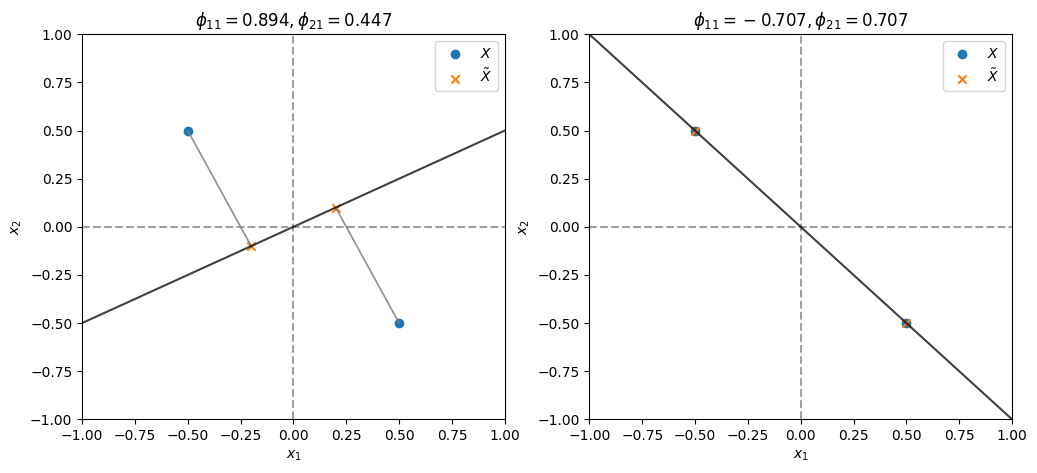

In [12]:
import matplotlib.pylab as plt
import numpy as np

X = np.array([[0.5, -0.5], [-0.5, 0.5]])
slope = 2
phi = np.array([slope, 1])
phi = phi / np.linalg.norm(phi)
phi = phi.reshape(-1, 1)
phi_optimal = np.array([[-0.707], [0.707]])
Z = np.matmul(X, phi)
X_tilde = np.matmul(Z, phi.transpose())
diff = (X_tilde-X)
Z_optimal = np.matmul(X, phi_optimal)
X_tilde_optimal = np.matmul(Z_optimal, phi_optimal.transpose())
diff_optimal = (X_tilde_optimal-X)


fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(X[:, 0], X[:, 1], label = r"$X$")
axs[0].scatter(X_tilde[:, 0], X_tilde[:, 1], marker = "x", label = r"$\tilde{X}$")
axs[0].set_xlim((-1, 1))
axs[0].set_ylim((-1, 1))
axs[0].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[0].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[0].axline(X_tilde[0], X_tilde[1], c = "black", alpha = 0.75)
axs[0].arrow(X[0, 0], X[0, 1], diff[0, 0], diff[0, 1], color = "grey", alpha = 0.75)
axs[0].arrow(X[1, 0], X[1, 1], diff[1, 0], diff[1, 1], color = "grey", alpha = 0.75)
axs[0].set_title(r"$\phi_{11} = 0.894, \phi_{21} = 0.447$")
axs[0].set_xlabel(r"$x_1$")
axs[0].set_ylabel(r"$x_2$")
axs[0].legend()

axs[1].scatter(X[:, 0], X[:, 1], label = r"$X$")
axs[1].scatter(X_tilde_optimal[:, 0], X_tilde_optimal[:, 1], marker = "x", label = r"$\tilde{X}$")
axs[1].set_xlim((-1, 1))
axs[1].set_ylim((-1, 1))
axs[1].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axline((0, 0), (phi_optimal[0][0], phi_optimal[1][0]), c = "black", alpha = 0.75)
axs[1].set_title(r"$\phi_{11} = -0.707, \phi_{21} = 0.707$")
axs[1].set_xlabel(r"$x_1$")
axs[1].set_ylabel(r"$x_2$")
axs[1].legend()

plt.show()

Für den allgemeinen Fall mit $p$ Variablen, können $d \leq p$ Hauptkomponenten identifziert werden. Eine nützliche Eigenschaft ist, dass die Hauptkomponenten immer in absteigender Reihenfolge den höchsten Anteil der gesamten Variation der Daten erklären können. Dies bedeutet, die Streung der ersten Hauptkomponente  in der Lage ist den höchsten Anteil der gesamten Streuung unter aller Hauptkomponenten zu erklären. Auch hier besteht erneut eine Analogie zum linearen Regressionsmodell, beim dem wir das Modell über das $R^2$ beuerteilt haben, dessen Wert umso höher ist, je mehr Variation der abhängigen Variable durch die Prognosen des Modells erklärt werden kann. Der Anteil erklärter Varianz durch die Hauptkomponente $m$ ist gegeben durch:

$$
\frac{\sum_{i=1}^n z_{im}^2}{\sum_{j = 1}^p \sum_{i = 1}^n x_{ij}^2}
$$

Entspechend ist der kumlative Anteil erklärter Varianz durch $M$ Hauptkomponenten gegeben durch:

$$
\frac{\sum_{m=1}^M \sum_{i=1}^n z_{im}^2}{\sum_{j = 1}^p \sum_{i = 1}^n x_{ij}^2}
$$

Zudem lässt sich zeigen, dass sich die gesamte Variation in den erklärbaren Anteil und den Fehler bei der Rückbildung der Originaldaten zusammensetzt:

$$
\sum_{j = 1}^p \sum_{i = 1}^n x_{ij}^2 = \sum_{m=1}^M \sum_{i=1}^n z_{im}^2 + \sum_{j = 1}^p \sum_{i = 1}^n \left( x_{ij} - \sum_{m=1}^M z_{im} \phi_{jm} \right)^2
$$

Aus dieser Darstellung sehen wir, dass der kumlative Anteil erklärter Varianz durch:

$$
1 - \frac{\sum_{j = 1}^p \sum_{i = 1}^n \left( x_{ij} - \sum_{m=1}^M z_{im} \phi_{jm} \right)^2}{\sum_{j = 1}^p \sum_{i = 1}^n x_{ij}^2}
$$

dargestellt werden kann, was sehr nahe an der Idee des $R^2$ der linearen Regression ist.

### Anzahl der Hauptkomponenten

Mit dem kumlativen Anteil erklärter Varianz, kann eine Entscheidung bei der Frage wieviele Hauptkomponenten verwendet werden sollten, getroffen werden. Im Beispiel der unteren Zelle sehen wir den (kumulativen) Anteil erklärter Varianz mit steigender Anzahl an Hauptkomponenten für einen Datensatz von Renditen der Aktienkurse der letzten eineinhalb Jahre von $20$ US Unternehmen. Wir sehen, dass bereits $10-15$ Hauptkomponenten genügen, um einen Großteil der vollständigen Variation aller Renditen zu erklären. Welcher Wert des kumulativen erklärten Anteils optimal ist, kann nicht allgemein beantwortet werden. Es besteht immer eine Art Trade-Off, den es zu beachten gilt. Werden viele Hauptkomponenten verwendet, ist die dimensionsreduzierte Form der Daten tendenziell näher an den Originaldaten. Bei weniger Hauptkomponenten ist die dimensionsreduzierte Form der Daten tendenziell weiter von den Originaldaten entfernt, jedoch bezieht sich diese Form mehr auf die wesentlichen Zusammenhänge der Originaldaten.

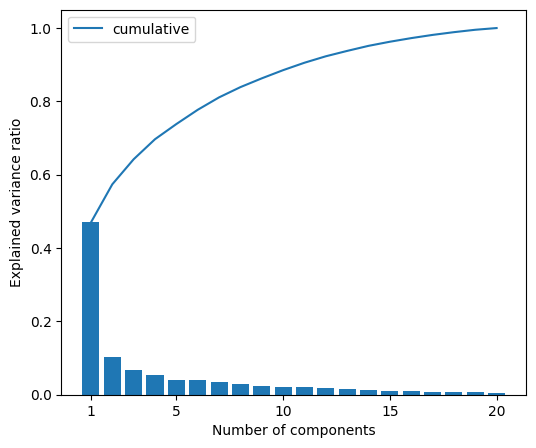

In [122]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pylab as plt


returns = pd.read_csv("../Daten/stock_returns.csv", index_col = "Date")
pca = PCA(n_components=returns.shape[1])
pca.fit(returns)

fig, ax = plt.subplots(figsize = (6, 5))
ax.bar(list(range(1, pca.n_components_+1, 1)), pca.explained_variance_ratio_)
ax.set_xticks([1, 5, 10, 15, 20], [str(i) for i in [1, 5, 10, 15, 20]])
ax.plot(list(range(1, pca.n_components_+1, 1)), np.cumsum(pca.explained_variance_ratio_), label = "cumulative")
ax.set_xlabel("Number of components")
ax.set_ylabel("Explained variance ratio")
ax.legend()
plt.show()